In [91]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.metrics import pairwise_distances_argmin, pairwise_distances
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial import Voronoi, voronoi_plot_2d
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

## KMeans Clustering

In [92]:
data, classes = make_blobs(n_samples=100, centers =4 , cluster_std = 1.3, random_state=8)

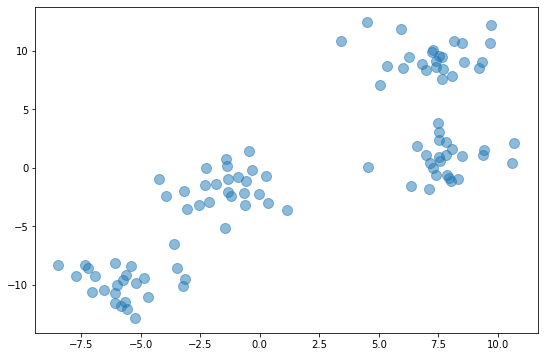

In [93]:
plt.figure(figsize=(9,6))
plt.scatter(data[:, 0], data[:, 1],cmap = 'viridis',s = 100, alpha = 0.5)


### first phase - choose how many clusters

In [94]:
N_CLUSTERS = 3

### second phase - initiate centroids

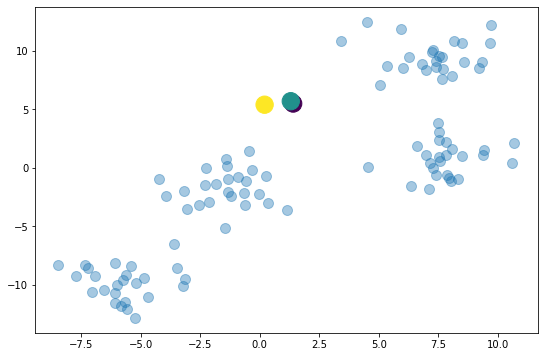

In [95]:
centers = np.array(
       [[1.4, 5.5],
       [1.3, 5.7],
       [0.2, 5.4]])
# centers = np.array(
#        [[0.2, 5.4],
#        [-5, -5.5],
#        [-2.5, -5]])
plt.figure(figsize=(9,6))
plt.scatter(data[:, 0], data[:, 1],cmap = 'viridis',s = 100, alpha = 0.4)
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(N_CLUSTERS), cmap='viridis', s=300)


### third phase -  assign each node to the closest centroid

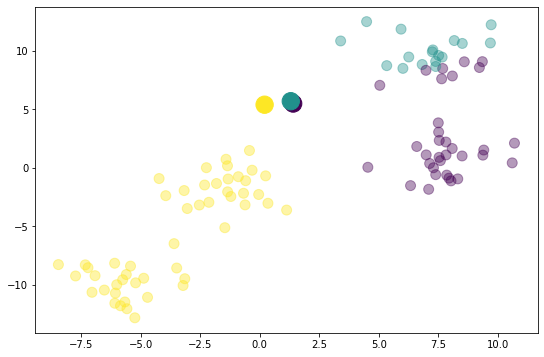

In [96]:
plt.figure(figsize=(9,6))
plt.scatter(data[:, 0], data[:, 1],c = pairwise_distances_argmin(data, centers), cmap = 'viridis',s = 100, alpha = 0.4)
plt.scatter(centers[:, 0], centers[:, 1], c=np.arange(N_CLUSTERS), cmap='viridis', s=300)

### recalculate centroid mean by it's members & assign each node to the closest centroid  

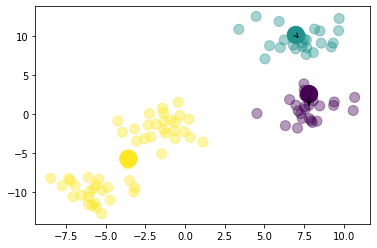

In [98]:
MAX___ITER = 2
centers_array = np.ndarray((MAX___ITER+1,N_CLUSTERS,2),dtype='float')
centers_array[0] = centers

for index in range(MAX___ITER):
    plt.cla()
    data_pred = pairwise_distances_argmin(data, centers_array[index])
    plt.scatter(data[:, 0], data[:, 1], c = data_pred,cmap = 'viridis',s = 100, alpha = 0.4)
    plt.scatter(centers_array[index][:, 0], centers_array[index][:, 1], c=np.arange(N_CLUSTERS), cmap='viridis', s=300)
    centers_array[index+1] =  np.array([data[data_pred == i].mean(0) for i in range(N_CLUSTERS)])
    for i in range(N_CLUSTERS):
        if np.isnan(centers_array[index+1][i]).any():
            centers_array[index+1][i] = centers_array[index][i]
        plt.annotate('', centers_array[index+1][i], centers_array[index][i], arrowprops=dict(arrowstyle='->', linewidth=1))
    

## Now - KMeans

In [99]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=3, max_iter=4, random_state=10)
kmeans_model.fit(data)
# kmeans_model.predict(data)

KMeans(max_iter=4, n_clusters=3, random_state=10)

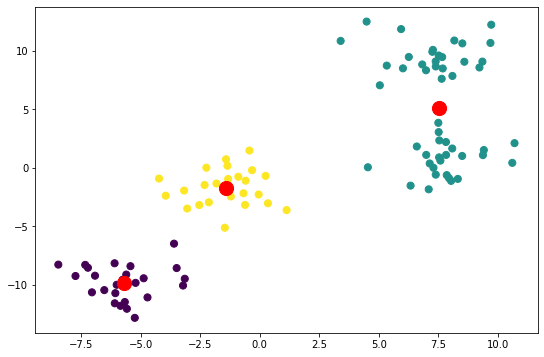

In [101]:
plt.figure(figsize=(9,6))
plt.scatter(data[:,0], data[:,1], c=kmeans_model.predict(data), s=50, cmap='viridis')
plt.scatter(kmeans_model.cluster_centers_[:,0], kmeans_model.cluster_centers_[:,1], 
            s=200, color='red')

# important issues

## 1. critical importance of scaling

In [71]:
my_data = {'names':['gil','moshe', 'roi', 'ziv'],
           'num_of_kids':[0,0,5,5],
           'num_of_dogs':[1,1,0,0,],
           'salary':[30000,27000,27000,30000]}
df = pd.DataFrame(my_data)
df

,names,num_of_kids,num_of_dogs,salary
0,gil,0,1,30000
1,moshe,0,1,27000
2,roi,5,0,27000
3,ziv,5,0,30000


In [73]:
from scipy.spatial.distance import squareform, pdist
pd.options.display.float_format = "{:,.1f}".format
pd.DataFrame(squareform(pdist(df.iloc[:, 1:])), columns=df.names.unique(), index=df.names.unique())

,gil,moshe,roi,ziv
gil,0.0,"3,000.0","3,000.0",5.1
moshe,"3,000.0",0.0,5.1,"3,000.0"
roi,"3,000.0",5.1,0.0,"3,000.0"
ziv,5.1,"3,000.0","3,000.0",0.0


## 2. how to choose number of clusters? 
####  WCSS (Within Clusters Sum of Squers)

In [22]:
def calc_WCSS(k, data):
    return KMeans(n_clusters=k).fit(data).inertia_

In [109]:
WCSS = [(k, calc_WCSS(k, data)) for k in range(1,10)]
WCSS

[(1, 8461.624301679476),
 (2, 2420.532166736754),
 (3, 1369.963852600552),
 (4, 394.39378840739033),
 (5, 352.6211739023427),
 (6, 317.0238031641808),
 (7, 280.78744333044006),
 (8, 241.87696670633744),
 (9, 213.63414216429118)]

Text(0.5, 0, 'num_of_clusters')

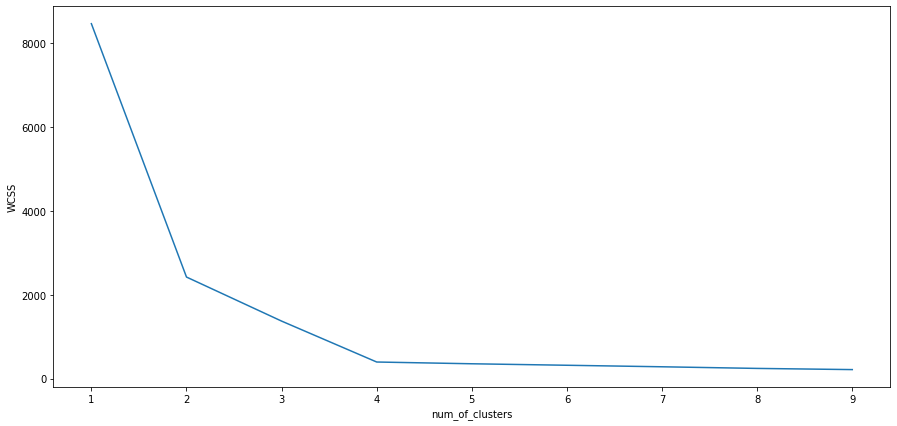

In [110]:
plt.figure(figsize=(15,7))
plt.plot(*zip(*WCSS))
plt.ylabel('WCSS')
plt.xlabel('num_of_clusters')

### iris dataset - how many types are there?

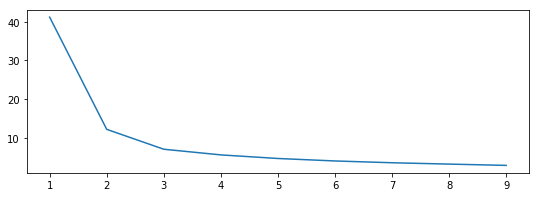

In [23]:
iris_dataset = load_iris()
scaled_iris = MinMaxScaler().fit_transform(iris_dataset['data'])
WCSS = [(k, calc_WCSS(k,scaled_iris)) for k in range(1,10)]
plt.figure(figsize=(9,3))
plt.plot(*zip(*WCSS))

## 3. random centroid init problem 

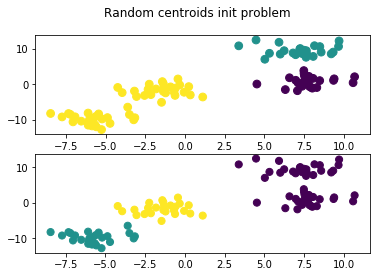

In [34]:
kmeans_model2 = KMeans(n_clusters=3, random_state=4)
kmeans_model1 = KMeans(n_clusters=3, random_state=100)
fig, axs = plt.subplots(2)
fig.suptitle('Random centroids init problem')
axs[0].scatter(data[:, 0], data[:, 1], c = data_pred,cmap = 'viridis',s = 60, alpha = 1.0)
axs[1].scatter(data[:,0], data[:,1], c=kmeans_model2.fit_predict(data), s=50, cmap='viridis')


## random centroid init solution - KMeans  ++ 

#### the data

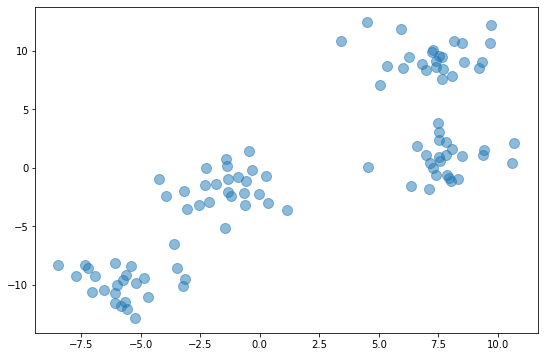

In [102]:
plt.figure(figsize=(9,6))
plt.scatter(data[:,0],data[:,1], s=100, alpha=0.5)

#### choose first centroid at random
#### calculate odds for each node to be chossen as next centroid, as a function of it's distance to the closest centroids

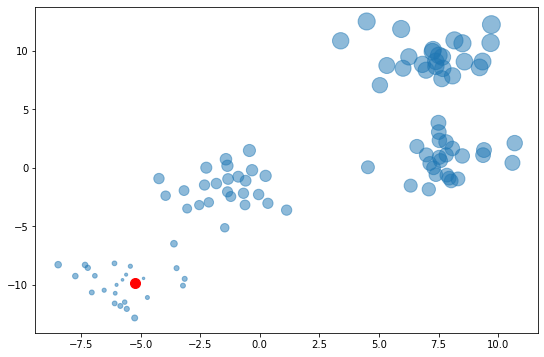

In [103]:
x,y =data[np.random.randint(1,100)]
plt.figure(figsize=(9,6))
plt.scatter(x,y, s=100, color='red')
distances = pairwise_distances(data, np.array((x,y)).reshape(1,2))
plt.scatter(data[:,0],data[:,1], s= distances*12, alpha=0.5)

#### while |centroids| < k:
        choose another centroid
        re-calculate distance to closest centroid for each node

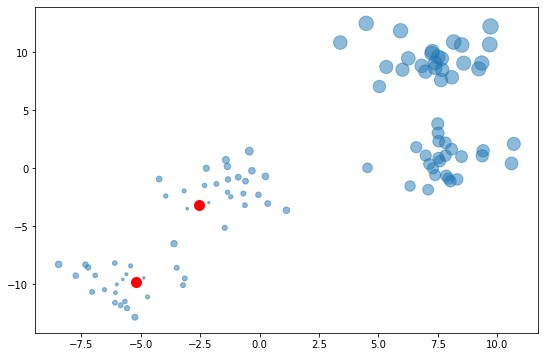

In [104]:
rand = np.random.randint(1,100)
x2,y2 =data[17]
plt.figure(figsize=(9,6))
plt.scatter(x2,y2, s=100, color='red')
plt.scatter(x,y, s=100, color='red')
distances = pairwise_distances(data, np.array([[x,y],[x2,y2]])).min(axis=1)
plt.scatter(data[:,0],data[:,1], s= distances*12, alpha=0.5)

#### kmeans makes it easy:

In [455]:
kmeans_model = KMeans(n_clusters=3, max_iter=4, init='k-means++')

# let's try different data

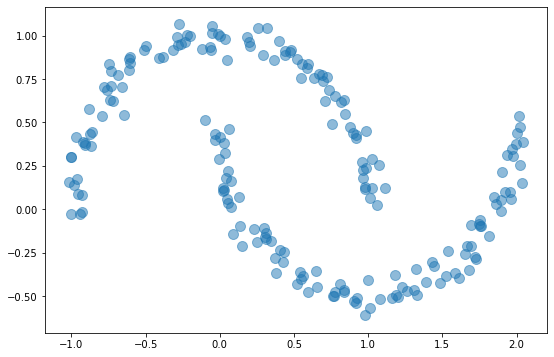

In [105]:
moon_data, classes = make_moons(n_samples=200, noise=0.05, random_state=1)
plt.figure(figsize=(9,6))
plt.scatter(moon_data[:,0], moon_data[:,1], s=100, alpha=0.5)

In [106]:
kmeans_model = KMeans(n_clusters=2).fit(moon_data)

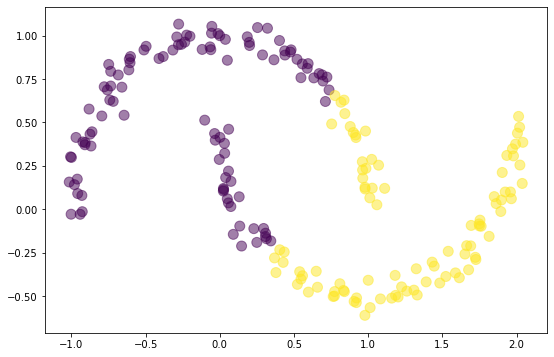

In [107]:
plt.figure(figsize=(9,6))
plt.scatter(moon_data[:,0], moon_data[:,1],c=kmeans_model.predict(moon_data),
            cmap='viridis', s=100, alpha=0.5)

kmeans disadvantage - it does not take into considiration the cluster's variance.
only the distances to the centroids and not the density 

# hierarchical algorithem

In [108]:
from scipy.cluster.hierarchy import dendrogram, linkage

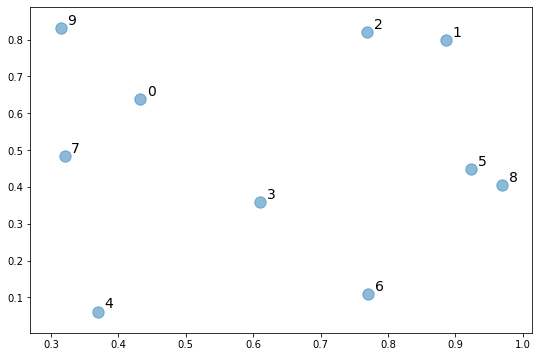

In [110]:
data = np.random.rand(10,2)
plt.figure(figsize=(9,6))
plt.scatter(data[:,0], data[:,1], s=130, alpha=0.5)
for i, (a, b) in enumerate(data):
    plt.text(a+0.01, b+0.01, str(i), size=14)

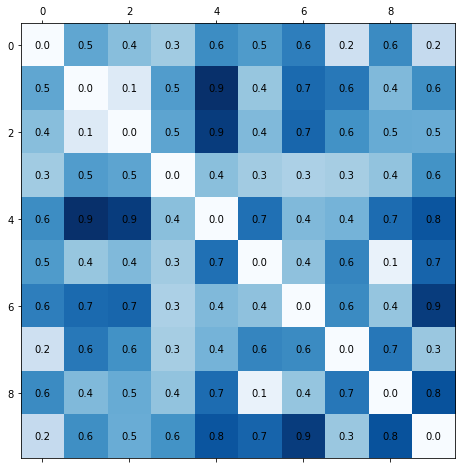

In [111]:
distances_matrix = pairwise_distances(data)
distances_matrix
fig, ax = plt.subplots(figsize=(8,8))

ax.matshow(distances_matrix, cmap=plt.cm.Blues, )
for i in range(10):
    for j in range(10):
        c = round(distances_matrix[j,i],1)
        ax.text(i, j, str(c), va='center', ha='center')


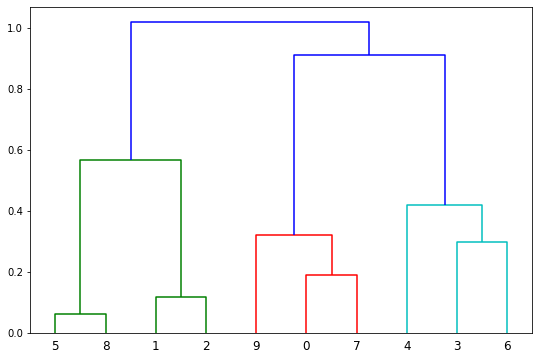

In [112]:
lin = linkage(data, 'ward')
plt.figure(figsize=(9,6))
dn = dendrogram(lin)

### linkage function

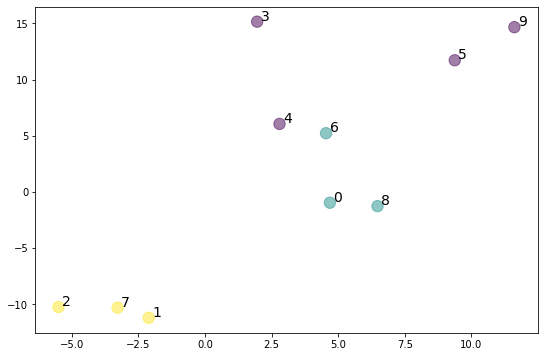

In [116]:
data = np.random.rand(10,2)
data, classes = make_blobs(n_samples=10, centers = 3, cluster_std = 2.4, random_state=8)
plt.figure(figsize=(9,6))
plt.scatter(data[:,0], data[:,1],c=classes,cmap='viridis', s=130, alpha=0.5)
for i, (a, b) in enumerate(data):
    plt.text(a+0.13, b+0.13, str(i), size=14)

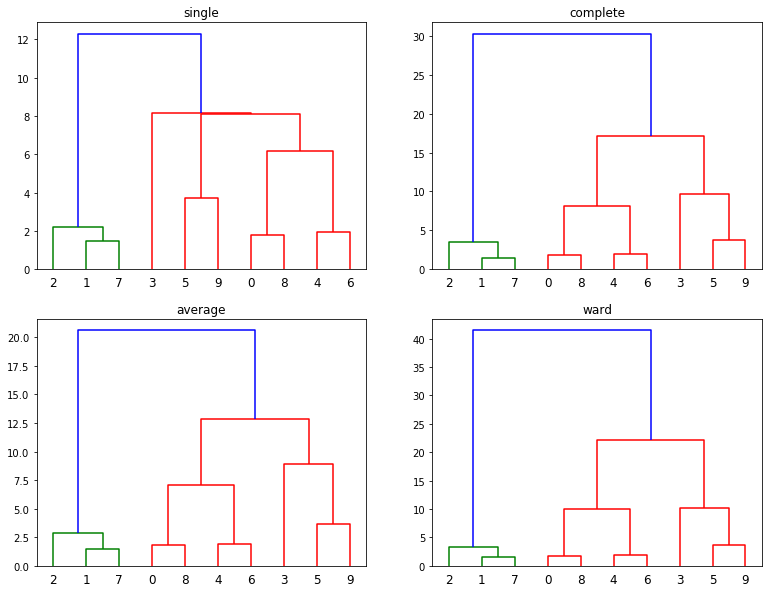

In [117]:
plt.figure(figsize=(13, 10))
methods = ['single','complete','average' , 'ward']

for i, method in enumerate(methods, 1):
    plt.subplot(2, 2, i)
    Z = linkage(data, method=method, metric='euclidean')
    dn = dendrogram(Z)
    plt.title(method)

## Agglomerative Clustering

In [118]:
from sklearn.cluster import AgglomerativeClustering

In [121]:
AgglomerativeClustering_model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')
AgglomerativeClustering_model.fit(data)

AgglomerativeClustering(linkage='single')

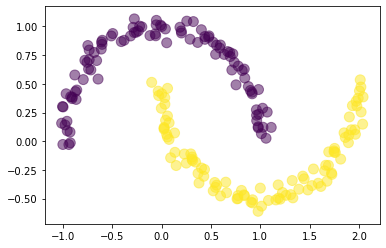

In [122]:
plt.scatter(moon_data[:,0], moon_data[:,1],c=AgglomerativeClustering_model.fit_predict(moon_data), s=100, alpha=0.5)

## DBSCAN

In [123]:
from sklearn.cluster import DBSCAN

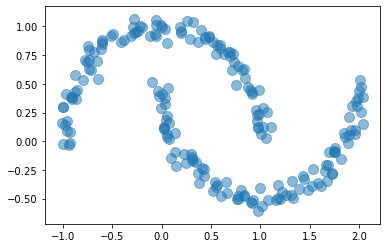

In [124]:
moon_data, classes = make_moons(n_samples=200, noise=0.05, random_state=1)
plt.scatter(moon_data[:,0], moon_data[:,1], s=100, alpha=0.5)


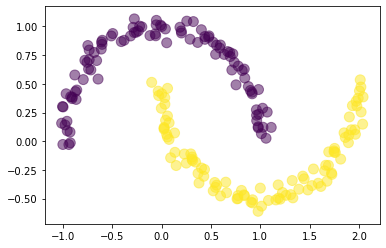

In [125]:
classes = DBSCAN(min_samples=5, eps=0.2).fit_predict(moon_data)
plt.scatter(moon_data[:,0], moon_data[:,1], c=classes, cmap='viridis', s=100, alpha=0.5)

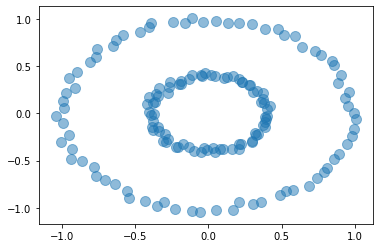

In [126]:
data, clasess = make_circles(n_samples=150, factor=.4, noise=.02)
plt.scatter(data[:,0], data[:,1], cmap='viridis', s=100, alpha=0.5)

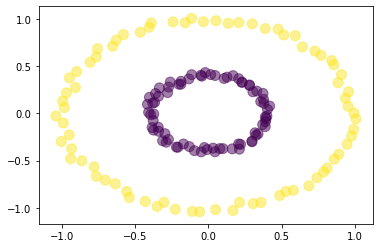

In [129]:
classes = DBSCAN(min_samples=5, eps=0.4).fit_predict(data)
plt.scatter(data[:,0], data[:,1], c=classes, cmap='viridis', s=100, alpha=0.5)

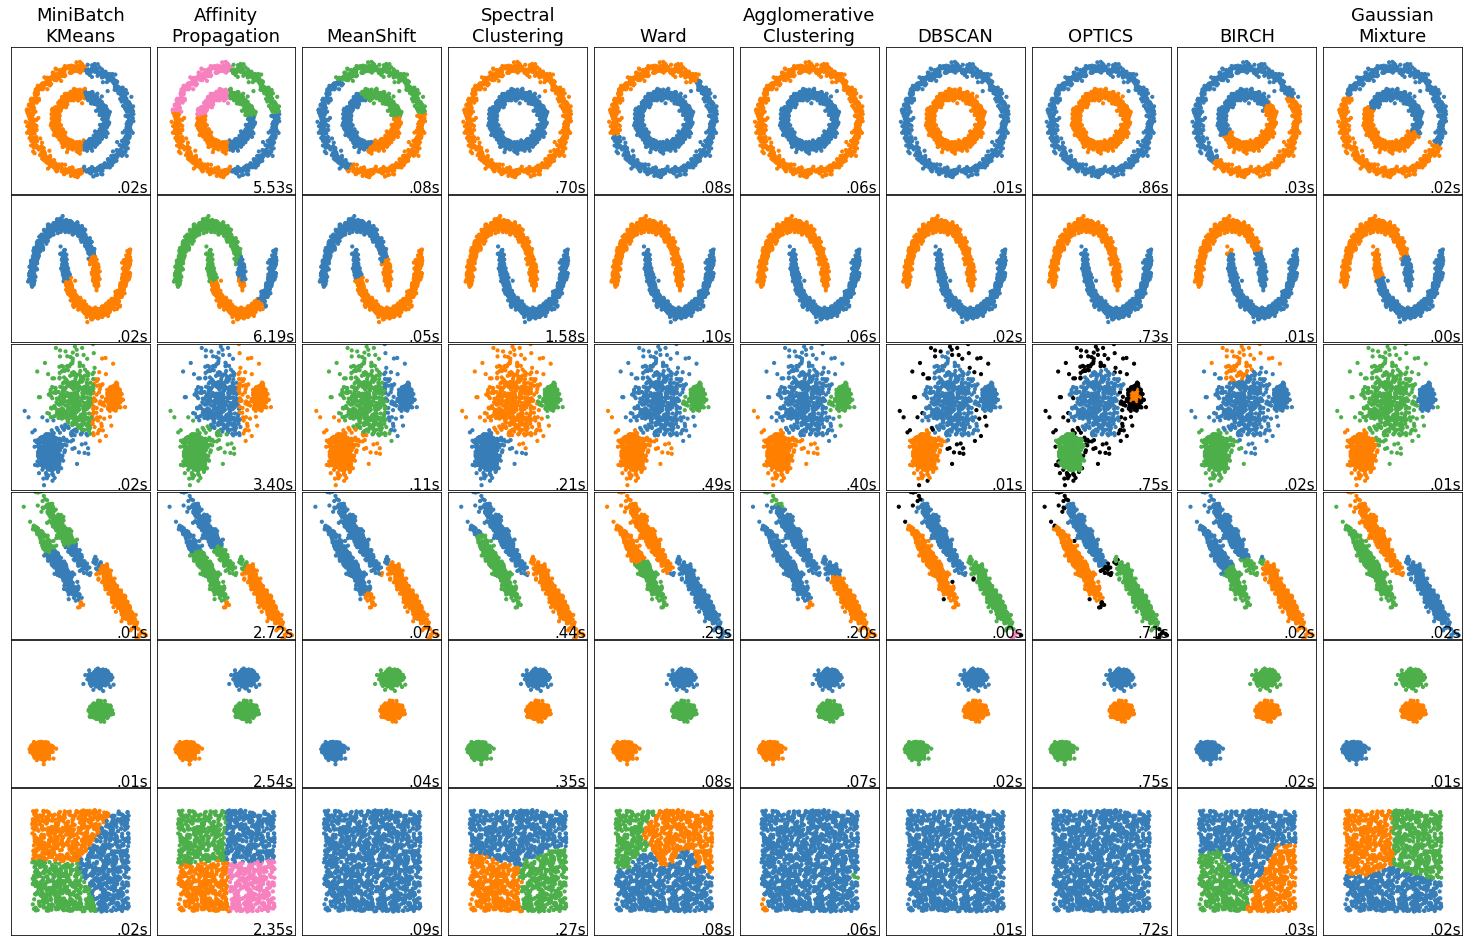

In [43]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.95, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'damping': .9,
                'preference': -200,
                'n_neighbors': 10,
                'n_clusters': 3,
                'min_samples': 20,
                'xi': 0.05,
                'min_cluster_size': 0.1}

datasets = [
    (noisy_circles, {'damping': .77, 'preference': -240,
                     'quantile': .2, 'n_clusters': 2,
                     'min_samples': 20, 'xi': 0.25}),
    (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2,
              'min_samples': 5, 'xi': 0.035, 'min_cluster_size': .2}),
    (aniso, {'eps': .15, 'n_neighbors': 2,
             'min_samples': 20, 'xi': 0.1, 'min_cluster_size': .2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # ============
    # Create cluster objects
    # ============
    ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
    two_means = cluster.MiniBatchKMeans(n_clusters=params['n_clusters'])
    ward = cluster.AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward',
        connectivity=connectivity)
    spectral = cluster.SpectralClustering(
        n_clusters=params['n_clusters'], eigen_solver='arpack',
        affinity="nearest_neighbors")
    dbscan = cluster.DBSCAN(eps=params['eps'])
    optics = cluster.OPTICS(min_samples=params['min_samples'], xi=params['xi'], min_cluster_size=params['min_cluster_size'])
    affinity_propagation = cluster.AffinityPropagation(
        damping=params['damping'], preference=params['preference'])
    average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=params['n_clusters'], connectivity=connectivity)
    birch = cluster.Birch(n_clusters=params['n_clusters'])
    gmm = mixture.GaussianMixture(
        n_components=params['n_clusters'], covariance_type='full')

    clustering_algorithms = (
        ('MiniBatch\nKMeans', two_means),
        ('Affinity\nPropagation', affinity_propagation),
        ('MeanShift', ms),
        ('Spectral\nClustering', spectral),
        ('Ward', ward),
        ('Agglomerative\nClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('OPTICS', optics),
        ('BIRCH', birch),
        ('Gaussian\nMixture', gmm)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()

        # catch warnings related to kneighbors_graph
        with warnings.catch_warnings():
            warnings.filterwarnings(
                "ignore",
                message="the number of connected components of the " +
                "connectivity matrix is [0-9]{1,2}" +
                " > 1. Completing it to avoid stopping the tree early.",
                category=UserWarning)
            warnings.filterwarnings(
                "ignore",
                message="Graph is not fully connected, spectral embedding" +
                " may not work as expected.",
                category=UserWarning)
            algorithm.fit(X)

        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right')
        plot_num += 1

plt.show()